In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
dataset_path = r"C:\New folder\VScode\Alzheimer Detection\Data2"
data = []

In [5]:
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)

            data.append({"image_path": image_path, "category": category})

In [6]:
df = pd.DataFrame(data)

output_csv = "dataset.csv"
df.to_csv(output_csv, index=False)

print(f"CSV file saved as {output_csv}")

CSV file saved as dataset.csv


category
NonDemented         9600
MildDemented        8960
VeryMildDemented    8960
ModerateDemented    6464
Name: count, dtype: int64


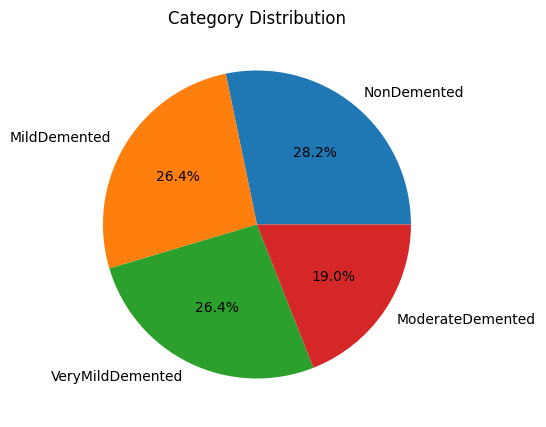

In [11]:
category_counts = df["category"].value_counts()
print(category_counts)

from matplotlib import figure

plt.figure(figsize=(12, 5))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%")
plt.title("Category Distribution")
plt.show()

In [13]:
min_class_size = df['category'].value_counts().min()
undersampled_df = (
    df.groupby('category', group_keys=False)
    .apply(lambda x: x.sample(n=min_class_size, random_state=42))
)

undersampled_csv = "undersampled_dataset.csv"
undersampled_df.to_csv(undersampled_csv, index=False)

print("Dataset undersampled successfully! New dataset saved to:", undersampled_csv)
df = undersampled_df
del undersampled_df
df.head()

Dataset undersampled successfully! New dataset saved to: undersampled_dataset.csv


C:\Users\chara\AppData\Local\Temp\ipykernel_4192\3105464362.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_class_size, random_state=42))


,image_path,category
1962,C:\New folder\VScode\Alzheimer Detection\Data2...,MildDemented
6596,C:\New folder\VScode\Alzheimer Detection\Data2...,MildDemented
653,C:\New folder\VScode\Alzheimer Detection\Data2...,MildDemented
7238,C:\New folder\VScode\Alzheimer Detection\Data2...,MildDemented
7074,C:\New folder\VScode\Alzheimer Detection\Data2...,MildDemented


category
MildDemented        6464
ModerateDemented    6464
NonDemented         6464
VeryMildDemented    6464
Name: count, dtype: int64


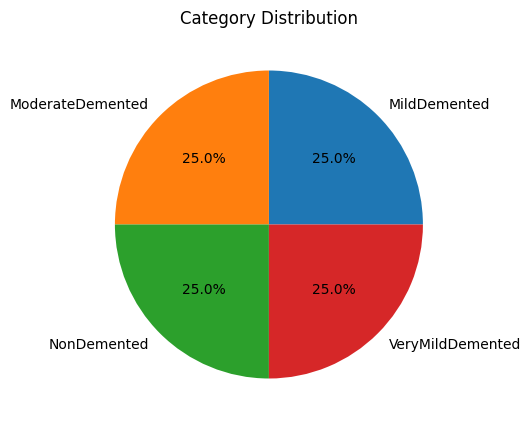

In [14]:
category_counts = df["category"].value_counts()
print(category_counts)

plt.figure(figsize=(12, 5))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%")
plt.title("Category Distribution")
plt.show()